# LSE Machine Learning: Practical Applications

## Module 6 Unit 1 IDE Activity (Assessment) | Execute tree-based methods in R

### In this IDE notebook, you are required to complete some of the steps to build and interpret a classification tree in R.
The instructions for this IDE activity are positioned as text cells before each step. As a result, you are required to read the text cells above a code cell, familiarise yourself with the required step, and then execute the step. You are encouraged to refer back to the practice IDE activity to familiarise yourself with the different steps and how they are executed in R.

1. Load the relevant packages.

To fit the classification tree onto a data set in R, the following packages are loaded: rpart, rpart.plot, caret, ROCR, and tree.

In [1]:
library('rpart')
library('rpart.plot')
library('caret')
library('ROCR')
library('tree')

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


2. Load the data, and analyse the data format and quality distribution.

In [2]:
# Load the data set
wine <- read.csv('winequality-white.csv', sep=';', stringsAsFactors=F)
# Review the data set
str(wine)


'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


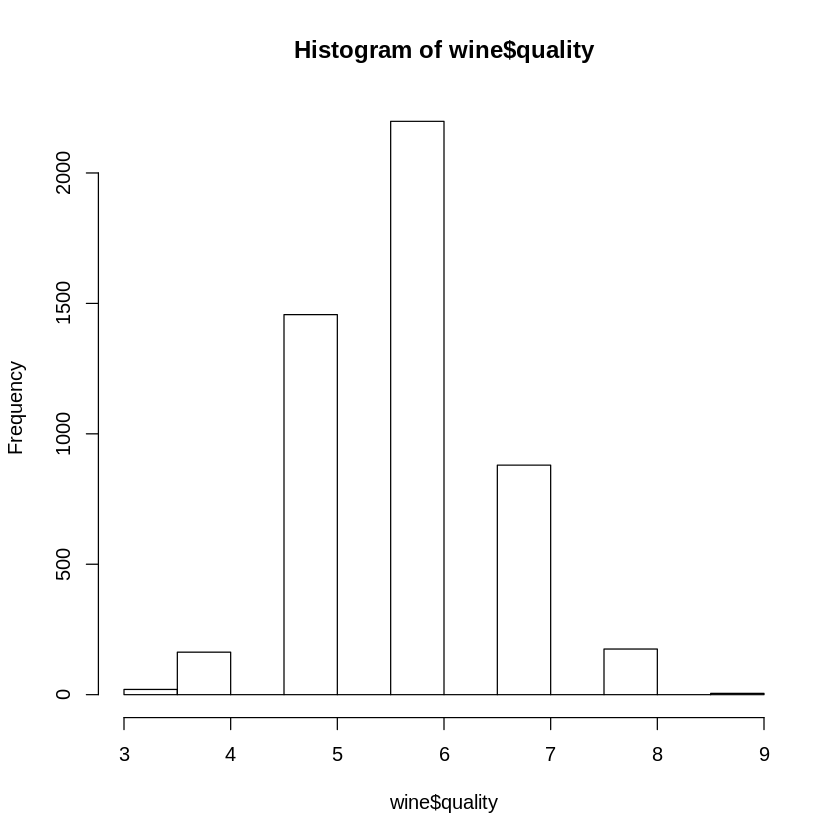

In [3]:
# Review the quality distribution
hist(wine$quality)

In [4]:
# Check for missing values
sum(is.na(wine))

[1] 0

3. Create the binary classifier. Assign a value of "high" to wines with a quality rating of 6 and higher, and a value of "low" to wines with a quality rating of less than 6.

In [5]:
# Create a quality factor variable where the quality is equal to or higher than 6
qF <- ifelse(wine$quality >= 6, "high", "low")
wine <- data.frame(wine, qF)
table(wine$qF)
head(wine)


high  low 
3258 1640 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,qF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,high
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,high
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,high
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,high
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,high
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,high


**Note:** The next section includes the steps of fitting, pruning, and interpreting the classification tree. You are required to create a tree object titled "tree.winequality", and aim to predict the variable created in Step 3 (qF). This variable should be predicted using all the available variables in the data set. Remember to exclude the original quality variable from the variables used in the prediction.

4. Create the tree and print the summary.

In [6]:
tree.winequality <- tree(qF ~. -quality, data = wine)

5. By using the `plot` and `text` functions respectively, plot the tree and add text descriptions.

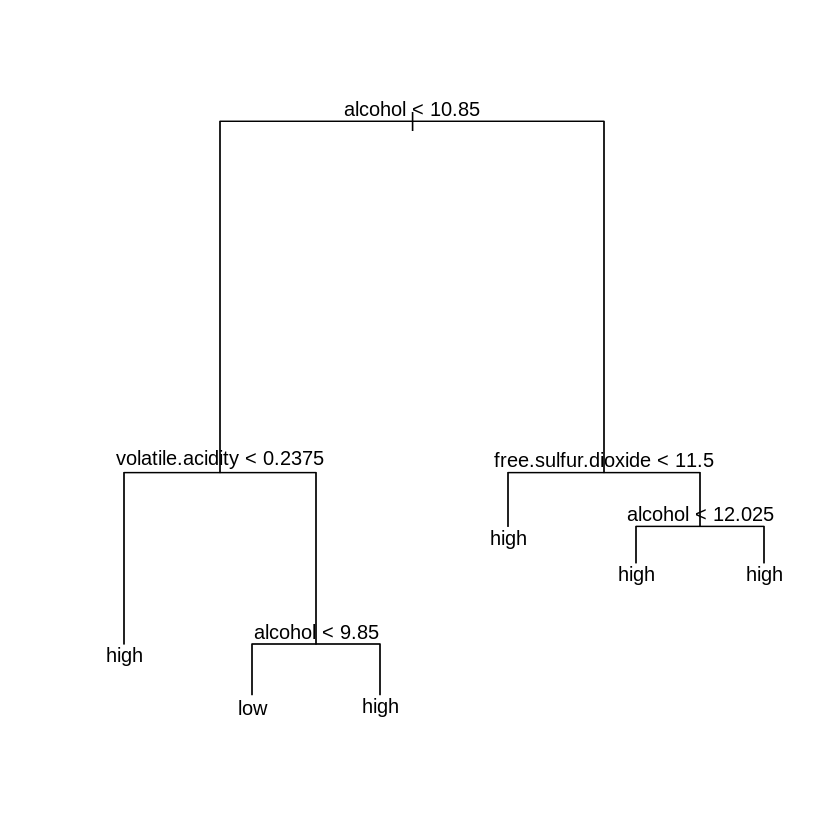

In [7]:
plot(tree.winequality)
text(tree.winequality , pretty = 0, cex=1)

6. Split the data into training and testing data sets.

In [8]:
# Split the data into training and testing data
set.seed(100)
train <-sample(1:nrow(wine), nrow(wine) / 2)
wine.test <- wine[-train,]
qF.test <-qF[-train]

7. Rebuild the classification tree using the same command as in Step 4, but add an appropriate model parameter to include only the training data set.

**Hint:** To set this model parameter, add the following command at the end of the code cell: `subset=train`.

In [9]:
tree.winequality <- tree(qF~.-quality, data = wine, subset=train)

8. Predict the class on the test data set and print the confusion matrix.

In [10]:
tree.pred <-predict(tree.winequality, wine.test, type="class")
table(tree.pred, qF.test)

         qF.test
tree.pred high  low
     high 1461  525
     low   148  315

**Pause and reflect:** Can you identify how many incorrect classifications were made by the model?

9. Calculate the misclassification rate of the classification tree.

In [11]:
# Misclassification error
mean(tree.pred!=qF.test)

[1] 0.274806

10. Apply cross-validation to determine the optimal level of complexity for the classification tree. 

**Hint:** Use the `prune.misclass` method demonstrated in the practice IDE activity, and set the parameter to `FUN`.

In [12]:
# Perform cross-validation
set.seed(3)
cv.wine <-cv.tree(tree.winequality, FUN = prune.misclass)
names(cv.wine)
cv.wine

[1] "size"   "dev"    "k"      "method"

$size
[1] 5 4 3 1

$dev
[1] 646 646 661 799

$k
[1] -Inf  0.0 12.0 80.5

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

11. Plot the output.

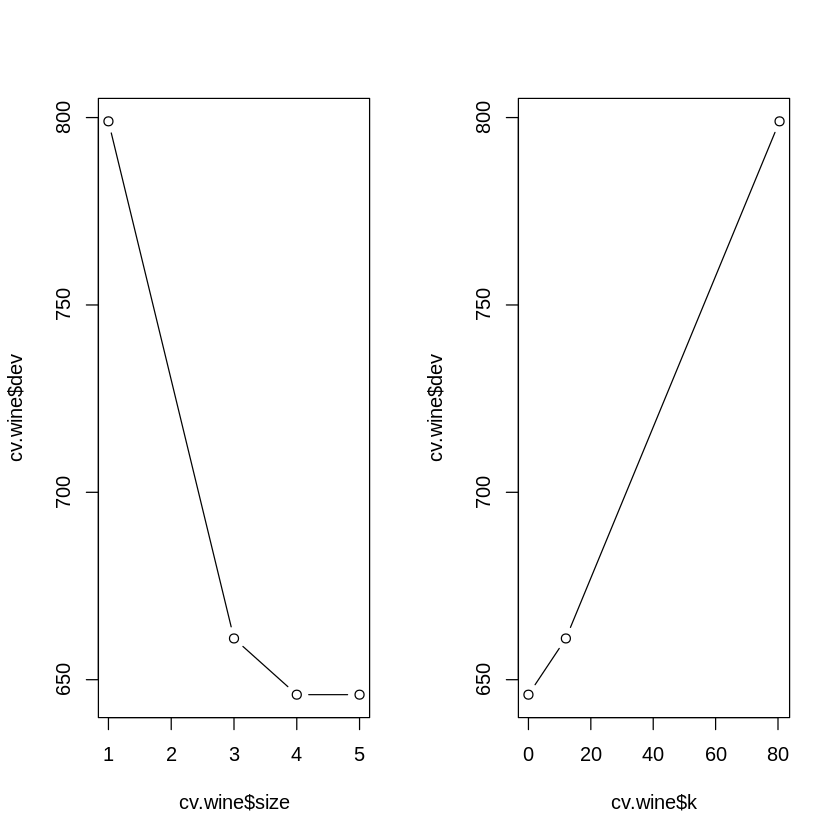

In [13]:
# Plot the output using graphs
par(mfrow=c(1,2))
plot(cv.wine$size, cv.wine$dev, type="b")
plot(cv.wine$k, cv.wine$dev, type="b")

12. Plot the pruned tree using the `plot` function, and add text to the tree using the `text` function.

**Hint:** Set pretty to 0, and select 4 terminal nodes, because it is the simplest model with the lowest `dev` value.

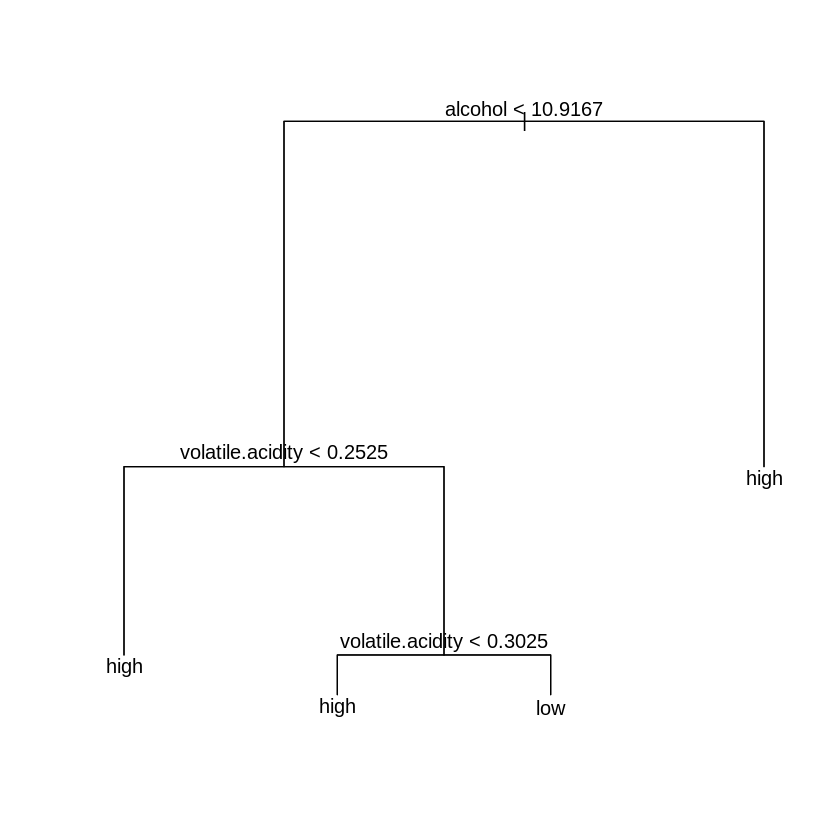

In [14]:
# Plot the pruned tree
par(mfrow = c(1,1))
prune.wine <- prune.misclass(tree.winequality, best=4)
# YOUR CODE HERE
plot(prune.wine)
text(prune.wine , pretty = 0, cex=1)

13. Generate the confusion matrix and calculate the misclassification error rate of the pruned tree.

In [15]:
# Compute the test error rate using the pruned tree 
tree.pred <-predict(prune.wine, wine.test, type="class")
table(tree.pred,qF.test)
mean(tree.pred!=qF.test)

         qF.test
tree.pred high  low
     high 1461  525
     low   148  315

[1] 0.274806

**Pause and reflect:** How does the performance of the pruned tree compare to the performance of the unpruned tree?

**Note:** Remember to submit this IDE notebook after completion and navigate back to this component on the Online Campus to share your thoughts and reflections with your peers in the class-wide discussion forum.